### Mean weighted Residual
## Rex McArthur

In [1]:
from __future__ import division, print_function
import numpy as np
from numpy.linalg import solve as lasolve
from matplotlib import pyplot as plt
from scipy.interpolate import barycentric_interpolate

In [2]:
def cheb(N):
    x = np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    dX = X - X.T
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

## Problem 1

In [3]:
def u(x):
    return np.e**x * np.cos(6*x)
def gauss_lobatto(x,n):
    return np.cos(np.pi * x/n)

def u_prime(x):
    return np.e**x*(np.cos(6*x)-6*np.sin(6*x))

In [4]:
N = [6,8,10]
pts = np.arange(101)
spaced_x = np.linspace(1,-1,101)
real_sol = u_prime(np.linspace(1,-1,101))
for n in N:
    D,x = cheb(n)
    y = D.dot(u(x))
    est = barycentric_interpolate(x,y,np.linspace(1,-1,101))
    plt.plot(spaced_x,est, label ='N = {}'.format(n))
    
plt.plot(spaced_x, real_sol, label='Actual')
plt.legend(loc='best')
plt.title('Problem 1')
plt.show()


### Problem 2

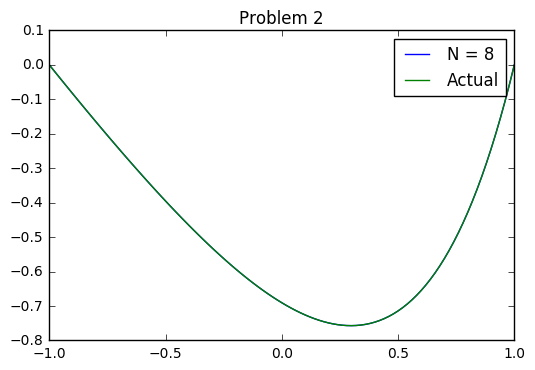

In [5]:
def func(x):
    return np.e**(2*x)

def func_actual(x):
    return (-np.cosh(2) - np.sinh(2)*x + np.e**(2*x))/4.
        
N = [8]
for n in N:
    D, x = cheb(n) #for some N
    F = func(x)
    D2 = np.dot(D, D)
    D2[0,:], D2[-1,:] = 0, 0
    D2[0,0], D2[-1,-1] = 1, 1
    F[0], F[-1] = 0, 0
    y = lasolve(D2, F)
    est = barycentric_interpolate(x,y,np.linspace(1,-1,101))
    plt.plot(spaced_x,est, label ='N = {}'.format(n))
    
x_act = np.linspace(1,-1,101)

y_act = func_actual(x_act)
plt.plot(x_act,y_act, label='Actual')
plt.legend(loc='best')
plt.title('Problem 2')
plt.show()

### Problem 3

In [6]:
def u3(x):
    return np.e**(3*x)

N = [8]
for n in N:
    D, x = cheb(n) #for some N
    F = func(x)
    D2 = np.dot(D, D) + D
    D2[0,:], D2[-1,:] = 0, 0
    D2[0,0], D2[-1,-1] = 1, 1
    F[0], F[-1] = -1,2
    y = lasolve(D2, F)
    est = barycentric_interpolate(x,y,np.linspace(-1,1,101))
    plt.plot(np.linspace(-1,1,101),est, label ='N = {}'.format(n))
    plt.legend(loc='best')
plt.show()

### Prob 4

In [7]:
from scipy.optimize import root
lmbd = [4,8,12]
N = 20
D, x = cheb(20)
D2 = D.dot(D)
#x = .5*x +.5
for l in lmbd:
    def F(U):
        out = 4*D2.dot(U) - l*np.sinh(l*U) #Set up the equation you want the root of.
        
        #Make sure to set the boundaries correctly
        
        out[0] = U[0]-1
        out[-1] = U[-1]
        return out #Newtons Method will update U until the output is all 0s.

    guess = np.ones(N+1) #Make your guess, same size as the cheb(N) output
    solution = root(F, guess).x
    est = barycentric_interpolate(x,solution,np.linspace(-1,1,101))
    plt.plot(np.linspace(0,1,101),est,label='$\lambda$ = {}'.format(l))
plt.legend(loc='best')
plt.show()

### Problem 5

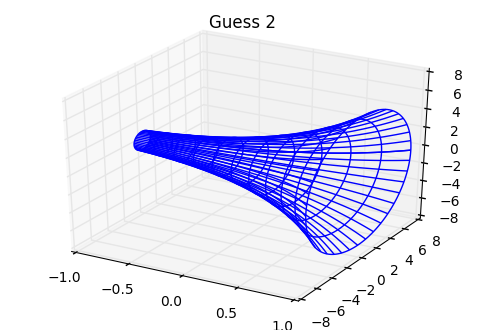

In [8]:
from mpl_toolkits.mplot3d import Axes3D

D, x = cheb(50)
D2 = D.dot(D)
def F(U):
    DY = D.dot(U)
    out = U *(D2.dot(U)) - DY*DY - np.ones(U.shape)
    out[0] = U[0] - 7
    out[-1] = U[-1] - 1
    return out #Newtons Method will update U until the output is all 0s.

guess1 = np.ones(x.shape)*1.#Make your guess, same size as the cheb(N) output
guess2 = np.ones(x.shape)*2
solution1 = root(F, guess1).x 
solution2 = root(F, guess2).x


barycentric1 = barycentric_interpolate(x,solution1,np.linspace(-1,1,100))
barycentric2 = barycentric_interpolate(x,solution2,np.linspace(-1,1,100))

lin = np.linspace(-1, 1, 100)
theta = np.linspace(0,2*np.pi,401)
X, T = np.meshgrid(lin, theta)
Y, Z = barycentric1*np.cos(T), barycentric1*np.sin(T)
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
plt.title('Guess 1')
plt.show()


X, T = np.meshgrid(lin, theta)
Y, Z = barycentric2*np.cos(T), barycentric2*np.sin(T)
fig = plt.figure()
ax = fig.gca(projection="3d")
plt.title("Guess 2")
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
plt.show()

We find two local min, but by integrating, we find that one is less than the other.

In [9]:
sum1 = np.sum(2*np.pi*solution1 * np.sqrt(1+(D.dot(solution1)**2)))/25
sum2 = np.sum(2*np.pi*solution2 * np.sqrt(1+(D.dot(solution2)**2)))/25

print('Integral for min 1 is {}'.format(sum1))
print('Integral for min 2 is {}'.format(sum2))


Integral for min 1 is 311.678584802
Integral for min 2 is 210.643469851


Thus the global min is 210.